<a href="https://colab.research.google.com/github/dikshithakalva/IIIT-H/blob/main/Probability_and_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

In [4]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

In [5]:
results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Tails    53
Heads    47
dtype: int64


In [6]:
results = pd.Series([np.sum(toss_coin(20) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [7]:
results = pd.Series([np.sum(toss_coin(500) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [8]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

9 cards were thrown: 7H 6D JH 3D 3S 10S 5D 6C 3C AH
32 cards were thrown: 8D JS 4D 9S 4S 5D 4H KS JC QS 6S 7D QH 9H 8H 2S 8C 10D 5S 4C 3D JD 5C 3H QD JH KC 6D 2C 6H QC 10S AH
0 cards were thrown: AC
6 cards were thrown: QD JH 7S 3H 8D JS AD
2 cards were thrown: 7D 6S AD
26 cards were thrown: 5D QC 3D 8C KD 9D 7C 6H 8S 3H KS 10S KH 6C 7D 5S QD JC 9H 10H 7S 5H 8H 3S 6D 5C AC
27 cards were thrown: 2H 10H 10S KS 8H 3H 5H JS 6C JH 7C 3D 4S QH 10C 6D 9H 3S JD 4C 3C 6H 8S 7D KC 7S 4D AH
12 cards were thrown: QD 7D 7S 10C 2C KC 2S 6H 5S JH 9D 7C AD
0 cards were thrown: AC
16 cards were thrown: KH 3C JC 4D 2C 8D 4H 4C 8H 2H 8S 3D 6D 9D JD KD AC

9.5595 cards are tossed before we see the first ace!


In [9]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

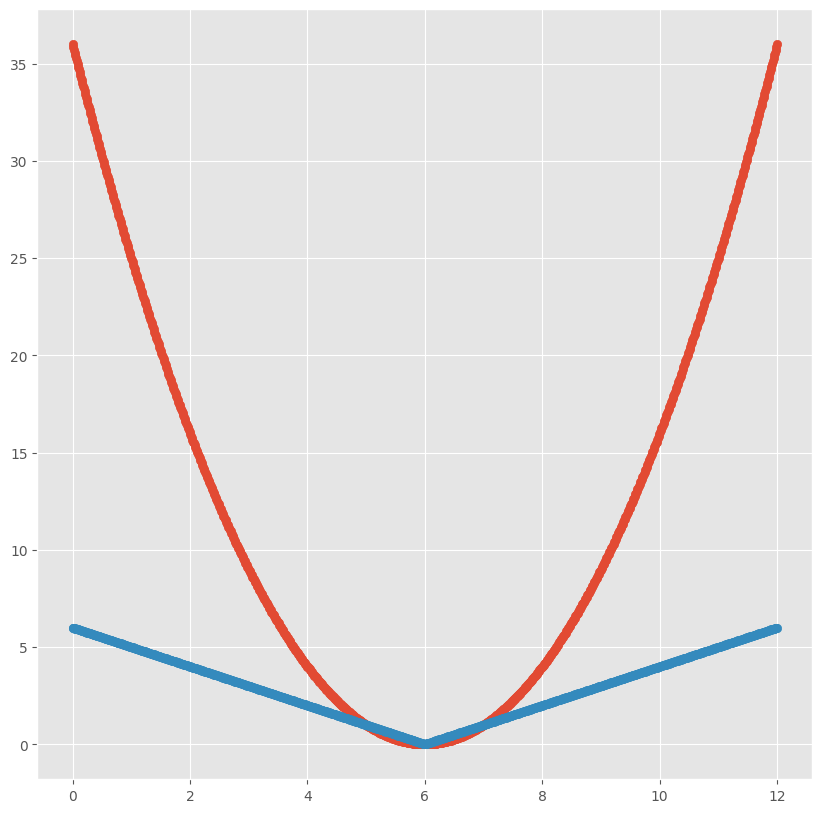

In [10]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

In [11]:
#Standarization
grades = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv")
print(grades.shape)
grades.agg(["mean", "var", "std"])

(26, 4)


<ipython-input-11-f1d41a44fd01>:4: FutureWarning:

['Name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,Physics,Biology,Maths
mean,63.769231,67.038462,69.769231
var,517.224615,456.758462,300.664615
std,22.742573,21.371908,17.339683


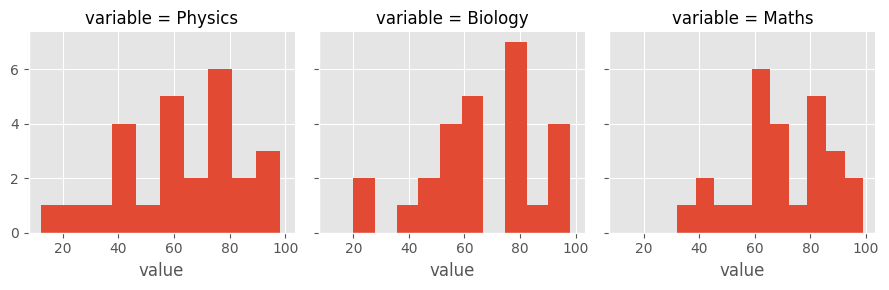

In [12]:
g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")

In [13]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std
0,Arnold,80,78,70,0.713673
1,Bob,60,98,45,-0.165735
2,Cassandra,34,56,65,-1.308965
3,Donovan,56,65,32,-0.341616
4,Emily,98,23,55,1.505141


In [14]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


In [15]:
#Binomial Distribution
from scipy.stats import binom

In [16]:
binom.pmf(k=5, n=5, p=0.25)

0.0009765625

In [17]:
 - binom.pmf(k=4, n=5, p=0.75) - binom.pmf(k=5, n=5, p=0.75)

-0.6328125

In [18]:
binom.cdf(3, n=5, p=0.75)

0.3671875

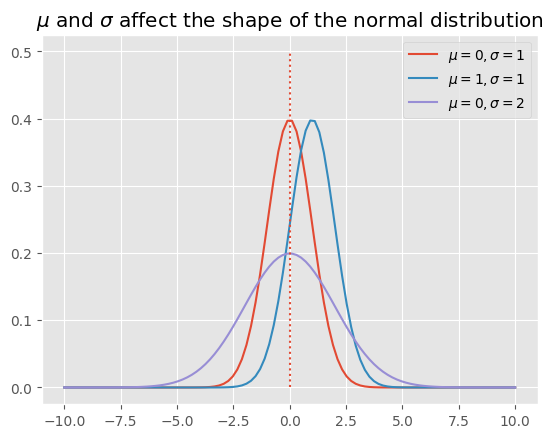

In [21]:
#Standard normal distribution
from scipy.stats import norm
x = np.linspace(-10, 10, 100)
f1 =norm.pdf(x, loc=0, scale=1)
f2 =norm.pdf(x, loc=1, scale=1)
f3 =norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

In [22]:
norm.cdf(0) #Cummulative density function(cdf)

0.5

In [23]:
norm.ppf(0.5) #percent point function

0.0

In [24]:
norm.ppf(0.84, loc=169.57, scale=7.57)

177.09804617589782

In [28]:
169.57 + 2* 7.57 # The tallest 2.5% of Malaysians

184.70999999999998

In [26]:
norm.ppf(0.975, loc=169.57, scale=7.57)

184.4069273629682

In [29]:
169.57 - 3 * 7.57

146.85999999999999

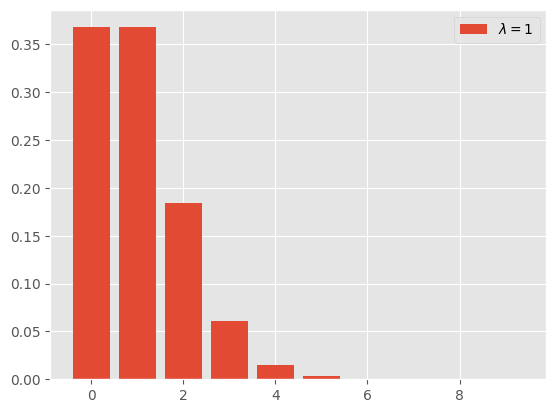

In [30]:
#Poisson Distribution
from scipy.stats import poisson
# a Poisson distribution with lambda=1 can be interpreted as:
# on average, 1 event occurs within the set time interval.
# naturally, it is less likely that more than 1 event occurs.

x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()

In [31]:
# the average can be calculated by multiplying the inputs with the values of the PMF
x @ f1
# see that this is equal to lambda

0.999998874797402

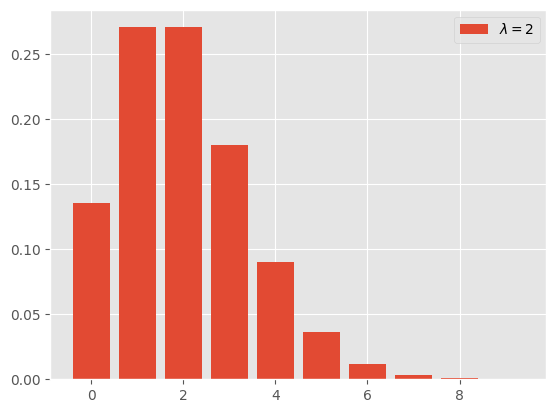

In [32]:
# for lambda=2, having 2 events is a lot more likely

plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

In [33]:
x @ f2

1.999525105343477

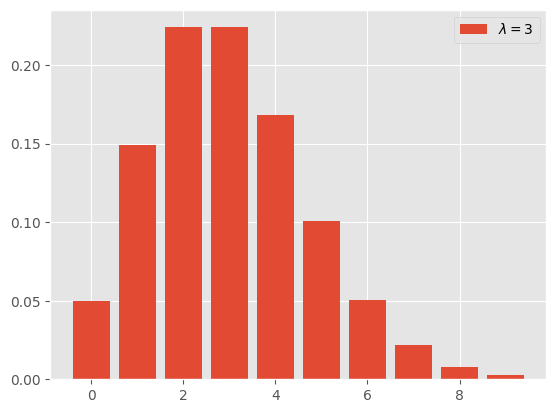

In [34]:
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

In [35]:
x @ f3

2.9885910238149727

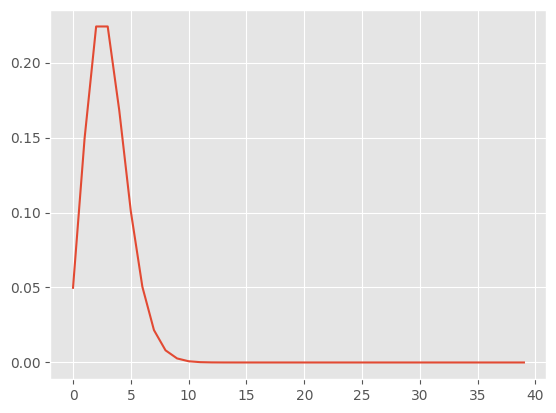

In [36]:
#Central Limit Theorem
from scipy.stats import poisson
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([12., 19., 68., 64., 97., 63., 47., 22.,  6.,  2.]),
 array([2.05 , 2.275, 2.5  , 2.725, 2.95 , 3.175, 3.4  , 3.625, 3.85 ,
        4.075, 4.3  ]),
 <BarContainer object of 10 artists>)

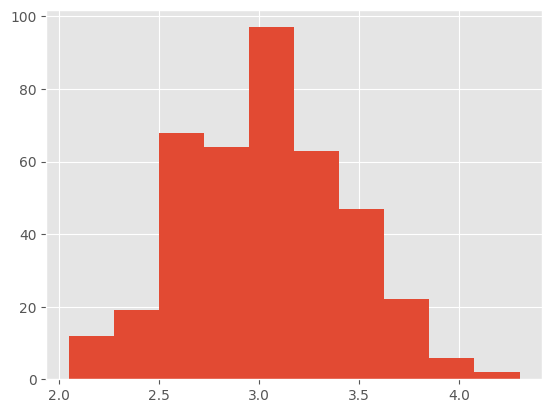

In [37]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)

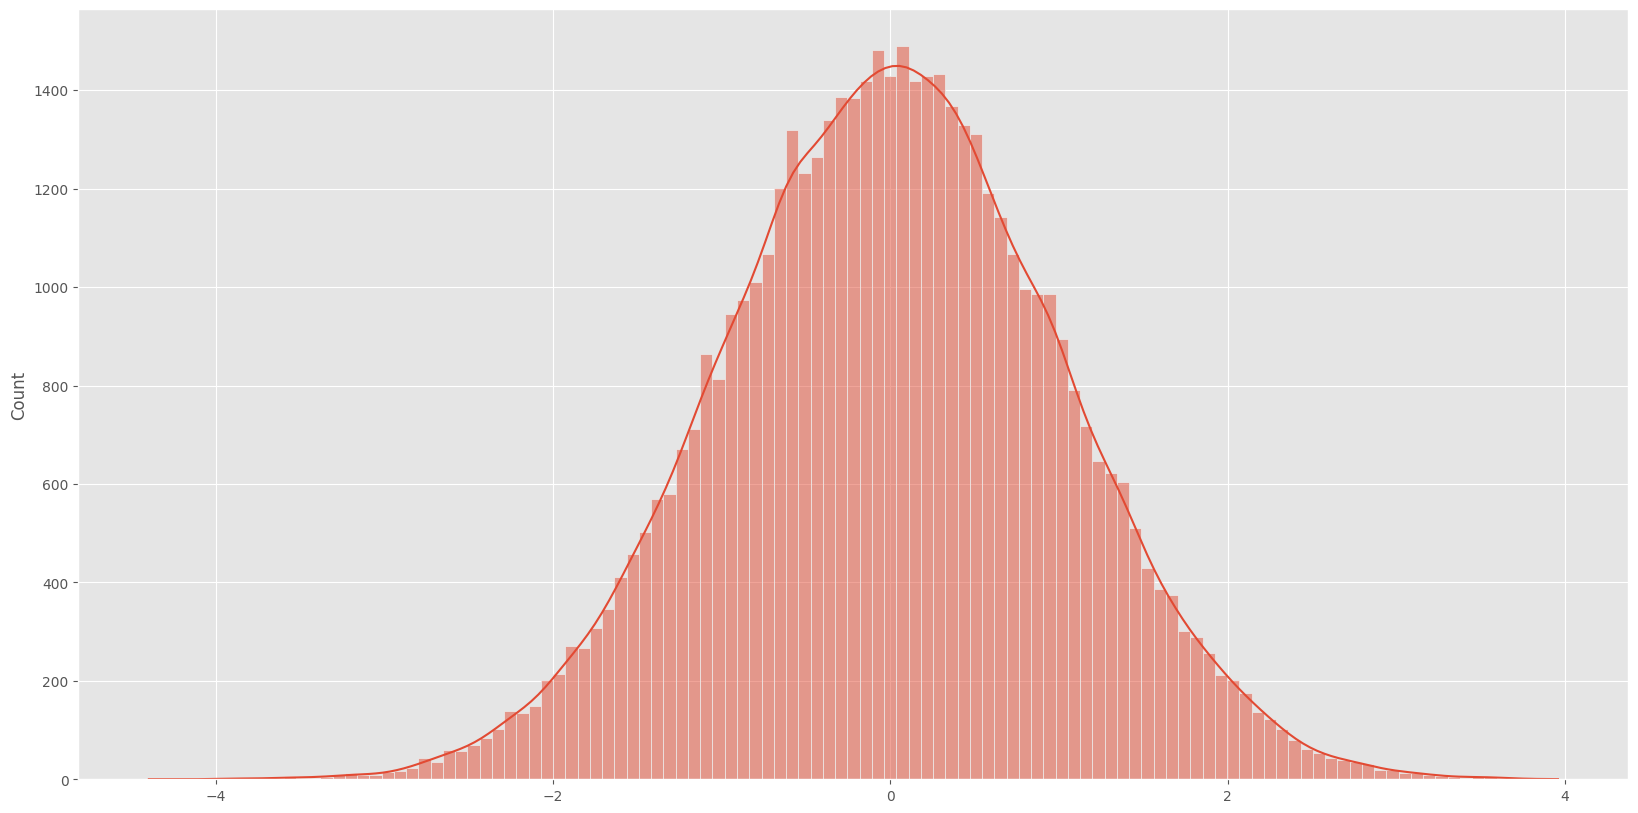

In [38]:
#Using Normal Distribution in Weight Initialization
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(50000))
sns.histplot(x, kde=True)
plt.show()

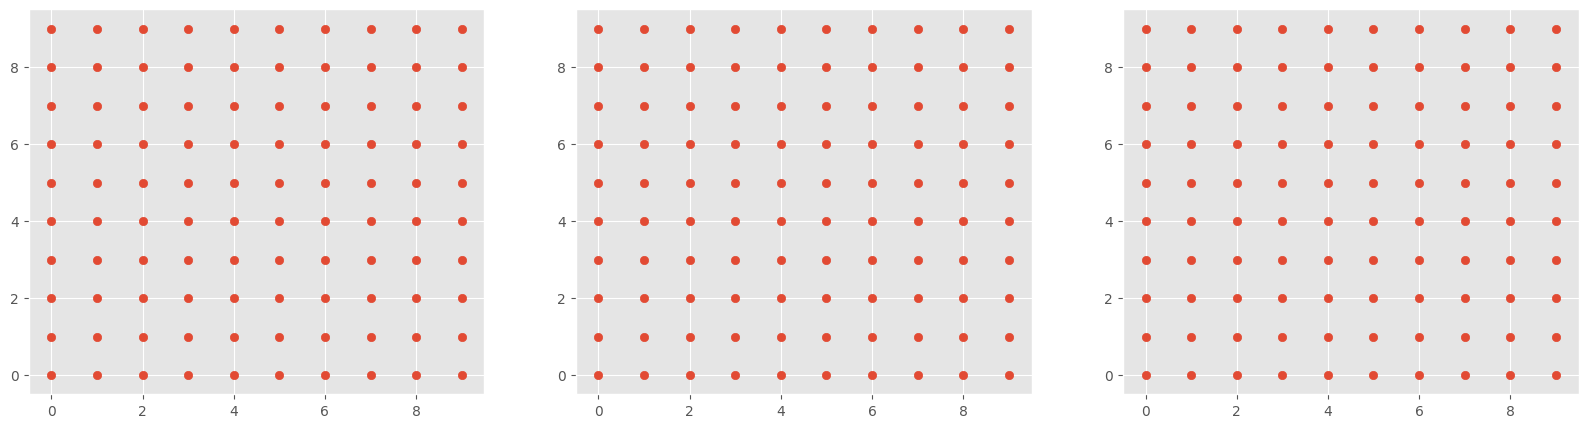

In [39]:
#Entropy
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

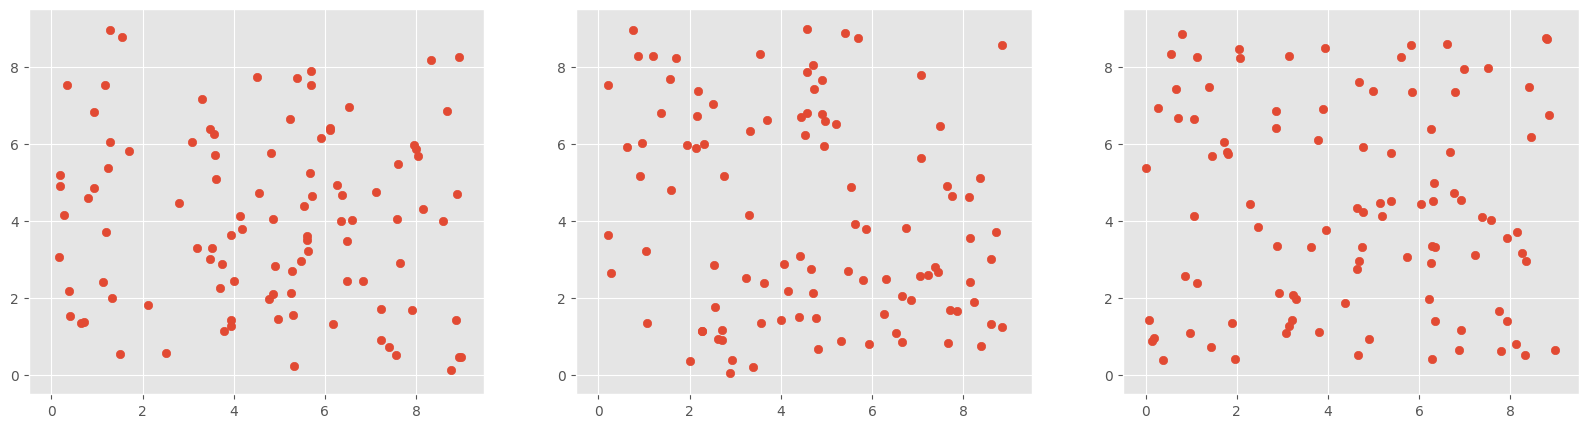

In [40]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.random(100) * 9, np.random.random(100) * 9
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

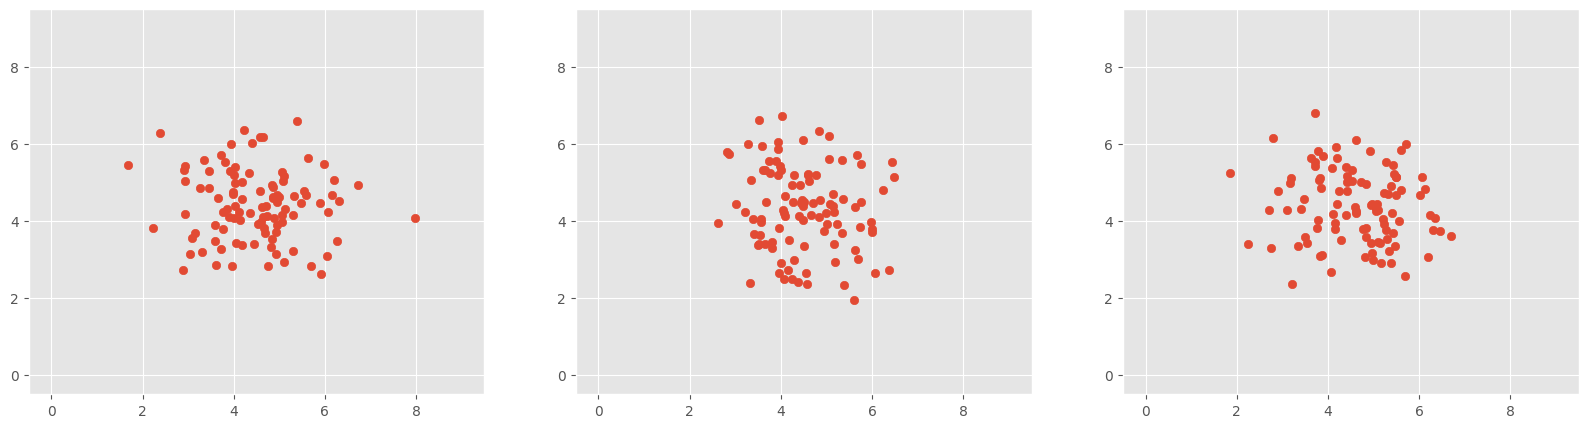

In [41]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.normal(loc=4.5, scale=1.0, size=100), np.random.normal(loc=4.5, scale=1.0, size=100)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()